In [1]:
import numpy as np

In [2]:
out_x = 32
r_vals = np.linspace(0, out_x, out_x, endpoint=False)  # 半径值

r_vals

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31.])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m = 5
n = 3
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n) #生成两个一维数组

X, Y = np.meshgrid(x, y) #转化为grid


In [4]:
X

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [5]:
l = [np.linspace(0, out_x, out_x, endpoint=False), np.linspace(0, out_x, out_x, endpoint=False)]

In [6]:
l

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.])]

In [7]:
l.extend(np.linspace(0, out_x, out_x, endpoint=False))

In [8]:
l

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31.]),
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0]

In [10]:
import numpy as np
img3d = np.random.random((10,20,30))
imgz, imgy, imgx = img3d.shape  # 使用 img3d 的形状
# 使用 np.ogrid 生成三维坐标网格
z, y, x = np.ogrid[:imgz, :imgy, :imgx]

print(z.shape, y.shape, x.shape)

(10, 1, 1) (1, 20, 1) (1, 1, 30)


拟合的平面方程: z = 2.00x + 3.02y + 9.92


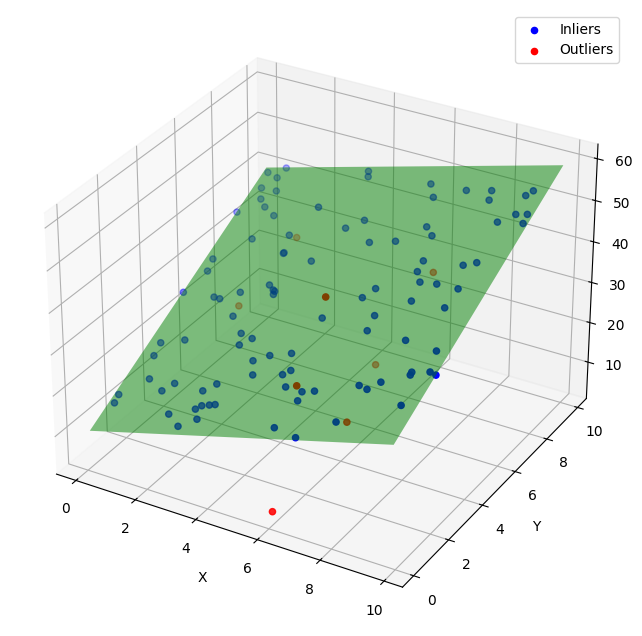

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

# 生成示例数据（包括离群点）
np.random.seed(42)

# 随机生成一组点，平面方程为 z = 2x + 3y + 10
n = 100
X = np.random.rand(n, 2) * 10  # 随机生成 x 和 y
Z = 2 * X[:, 0] + 3 * X[:, 1] + 10  # 计算对应的 z 坐标

# 添加一些离群点
outliers = np.random.rand(10, 2) * 10
outliers_z = np.random.rand(10) * 50  # 离群点的 z 值远离拟合平面

# 合并正常点和离群点
X_all = np.vstack([X, outliers])
Z_all = np.hstack([Z, outliers_z])

# RANSAC 拟合平面
# 将 X 和 Z 组合成三维数据点
X_all = np.column_stack([X_all, Z_all])  # 三维点（x, y, z）

# 使用 RANSAC 算法拟合平面
ransac = RANSACRegressor()
ransac.fit(X_all[:, :2], X_all[:, 2])  # 用 (x, y) 来预测 z

# 获取拟合平面参数
slope = ransac.estimator_.coef_
intercept = ransac.estimator_.intercept_

print("拟合的平面方程: z = {:.2f}x + {:.2f}y + {:.2f}".format(slope[0], slope[1], intercept))

# 获取内点和外点
inlier_mask = ransac.inlier_mask_  # 获取内点的布尔掩膜
outlier_mask = ~inlier_mask  # 外点是内点掩膜的反向

# 绘制结果
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制内点和外点
ax.scatter(X_all[inlier_mask, 0], X_all[inlier_mask, 1], X_all[inlier_mask, 2], color='b', label='Inliers')
ax.scatter(X_all[outlier_mask, 0], X_all[outlier_mask, 1], X_all[outlier_mask, 2], color='r', label='Outliers')

# 绘制拟合平面
xx, yy = np.meshgrid(np.linspace(X_all[:, 0].min(), X_all[:, 0].max(), 20),
                     np.linspace(X_all[:, 1].min(), X_all[:, 1].max(), 20))
zz = slope[0] * xx + slope[1] * yy + intercept
ax.plot_surface(xx, yy, zz, color='g', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


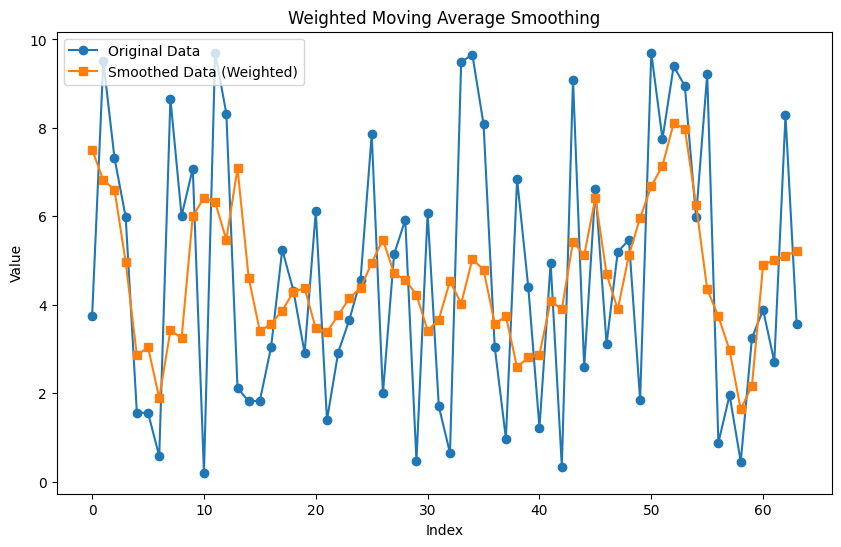

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def weighted_moving_average(data, weights, window_size):
    """
    加权移动平均平滑
    :param data: 原始数据（长度为64的数组）
    :param weights: 权重数组（长度为64）
    :param window_size: 滑动窗口大小
    :return: 平滑后的数据
    """
    smoothed_data = np.zeros_like(data)
    half_window = window_size // 2

    for i in range(len(data)):
        # 确定窗口范围
        start = max(0, i - half_window)
        end = min(len(data), i + half_window + 1)
        
        # 提取窗口内的数据和权重
        window_data = data[start:end]
        window_weights = weights[start:end]
        
        # 计算加权平均
        smoothed_data[i] = np.sum(window_data * window_weights) / np.sum(window_weights)
    
    return smoothed_data

# 示例数据
np.random.seed(42)
data = np.random.rand(64) * 10  # 随机生成64个数值
weights = np.random.rand(64)    # 随机生成64个权重

# 平滑处理
window_size = 5  # 滑动窗口大小
smoothed_data = weighted_moving_average(data, weights, window_size)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(data, 'o-', label='Original Data')
plt.plot(smoothed_data, 's-', label='Smoothed Data (Weighted)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Weighted Moving Average Smoothing')
plt.legend()
plt.show()

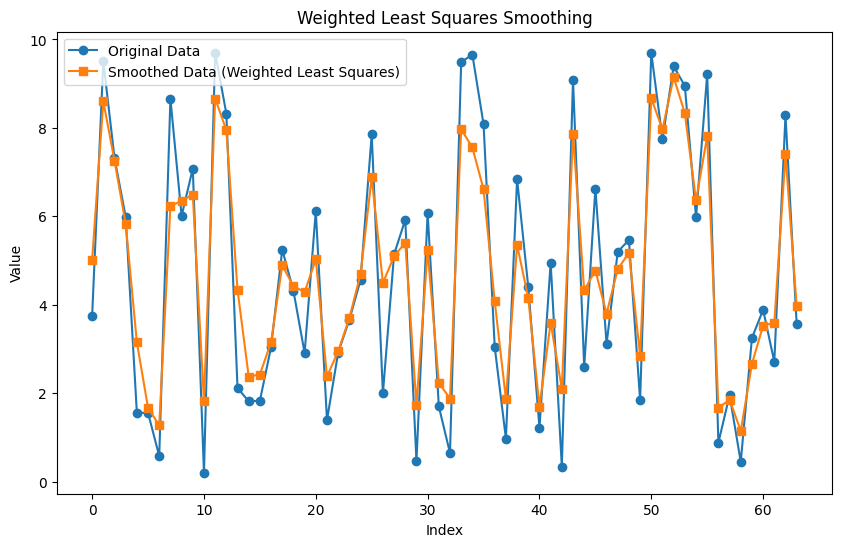

In [2]:
from scipy.optimize import minimize

def weighted_smooth(data, weights, smoothness=0.1):
    """
    加权最小二乘法平滑
    :param data: 原始数据（长度为64的数组）
    :param weights: 权重数组（长度为64）
    :param smoothness: 平滑系数（越大越平滑）
    :return: 平滑后的数据
    """
    n = len(data)
    
    def objective(x):
        # 目标函数：加权误差 + 平滑惩罚
        error = np.sum(weights * (x - data) ** 2)  # 加权误差
        smooth_penalty = np.sum((x[1:] - x[:-1]) ** 2)  # 平滑惩罚
        return error + smoothness * smooth_penalty
    
    # 初始猜测为原始数据
    x0 = data.copy()
    
    # 最小化目标函数
    result = minimize(objective, x0, method='BFGS')
    return result.x

# 示例数据
np.random.seed(42)
data = np.random.rand(64) * 10  # 随机生成64个数值
weights = np.random.rand(64)    # 随机生成64个权重

# 平滑处理
smoothed_data = weighted_smooth(data, weights, smoothness=0.1)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(data, 'o-', label='Original Data')
plt.plot(smoothed_data, 's-', label='Smoothed Data (Weighted Least Squares)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Weighted Least Squares Smoothing')
plt.legend()
plt.show()

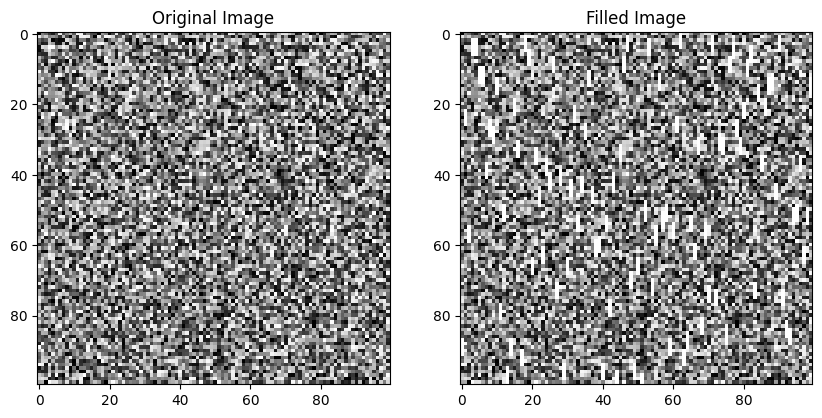

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 示例图片
image = np.random.rand(100, 100) * 255  # 生成一个 100x100 的随机图片
image = image.astype(np.uint8)  # 转换为 uint8 类型

# 沿着 axis=0 计算 argmax
argmax_indices = np.argmax(image, axis=0)  # 每一列的最大值所在的行索引

# 创建一个与图片大小相同的掩码，用于标记条状区域
mask = np.zeros_like(image, dtype=bool)

# 设置条状区域的宽度
width = 5
half_width = width // 2

# 填充条状区域
for col in range(image.shape[1]):
    row = argmax_indices[col]
    start_row = max(0, row - half_width)
    end_row = min(image.shape[0], row + half_width + 1)
    mask[start_row:end_row, col] = True  # 标记条状区域

# 根据掩码填充条状区域
filled_image = image.copy()
filled_image[mask] = 255  # 将条状区域的值设置为 255（白色）

# 可视化结果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Image")
plt.imshow(filled_image, cmap='gray')

plt.show()

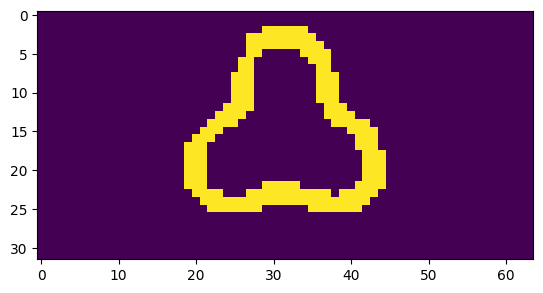

In [3]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

# 设置图像尺寸
H, W = 32, 64
center = (W // 2, H // 2)

# 生成角度
theta = np.linspace(0, 2 * np.pi, 64)

# 定义中心半径的变化（示例：一个小的扰动）
r_center = 10 + 3 * np.sin(3 * theta)  # 例如，带波动的中心线
r_width = 3  # 环的宽度

# 计算内外边界
r_inner = r_center - r_width // 2
r_outer = r_center + r_width // 2

# 转换为笛卡尔坐标
x_inner = (r_inner * np.cos(theta) + center[0]).astype(np.int32)
y_inner = (r_inner * np.sin(theta) + center[1]).astype(np.int32)

x_outer = (r_outer * np.cos(theta) + center[0]).astype(np.int32)
y_outer = (r_outer * np.sin(theta) + center[1]).astype(np.int32)

# 创建空白图像
image = np.zeros((H, W), dtype=np.uint8)

# 画出填充的环
pts = np.vstack((np.column_stack((x_outer, y_outer)), np.column_stack((x_inner[::-1], y_inner[::-1]))))
cv2.fillPoly(image, [pts], 255)

# 显示结果
# cv2.imshow("Generated Ring", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


plt.imshow(image)

In [ ]:
import numpy as np
import cv2

# 设定图像尺寸
H, W = 512, 512
center = (W // 2, H // 2)  # 设定中心点

# 生成网格坐标
Y, X = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')

# 计算每个像素点相对于中心点的 θ
theta = np.arctan2(Y - center[1], X - center[0])  # 结果单位：弧度 [-π, π]

# 可视化 theta 映射
theta_norm = (theta + np.pi) / (2 * np.pi)  # 归一化到 [0, 1] 方便可视化
theta_image = (theta_norm * 255).astype(np.uint8)

cv2.imshow("Theta Map", theta_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
